# Data Analysis of Profits/Losses Data

12/01/2024

## Libaries & Relevant Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# To import excel files into dataframes
def func_import_xls(filename, sheetname):
    df = pd.read_excel(filename, sheetname)
    return df

In [3]:
# To check any missing values
def func_check_missing_value(df):
    return df[df.isnull().any(axis=1)]

In [4]:
# To check any zero values
def func_check_zero_value(df):
    return df[(df == 0).any(axis=1)]

## Data Loading

In [5]:
### Put the excel file into the same directory as this notebook
# To load the data into dataframes
file = 'interview_presentation_data.xlsx'
tbl_variables = func_import_xls(file, 'Variables')
tbl_data = func_import_xls(file, 'Simulated Data')

In [6]:
tbl_variables

,Variable,Explanation
0,ID,Unique ID for each simulated reporter
1,period,Reporting period - equivalent to quarterly data
2,PL1,Interest receivable
3,PL2,Interest payable
4,PL5,Fees receivable
5,PL6,Fees payable
6,PL8,Dealing profits/losses
7,PL9,Operating income
8,PL12,Operating expenditure


In [7]:
tbl_data

,ID,period,PL1,PL2,PL5,PL6,PL8,PL9,PL12
0,1,1,393.4,203.1,97.5,33.4,95.7,39.1,142.3
1,1,2,405.9,296.0,84.8,34.9,-291.7,39.5,137.4
2,1,3,392.2,298.3,62.4,25.1,30.2,35.7,71.5
3,1,4,404.6,303.0,102.9,27.6,9.5,49.7,138.8
4,1,5,294.2,274.3,142.1,26.0,91.8,35.4,103.0
...,...,...,...,...,...,...,...,...,...
3595,992,20,2156.4,1858.2,2.6,118.9,402.8,116.9,1413.0
3596,992,21,1951.8,1706.4,56.0,118.1,153.5,64.8,865.5
3597,992,22,1963.4,1627.2,99.8,113.5,-672.1,99.9,1035.6
3598,992,23,1568.9,1486.8,37.8,90.6,155.0,117.7,1129.1


## Data Cleaning

### Renaming column names

In [8]:
# Create a list of [Variable, Explanation] values 
lst = list(zip(tbl_variables['Variable'], tbl_variables['Explanation']))
lst

[('ID', 'Unique ID for each simulated reporter'),
 ('period', 'Reporting period - equivalent to quarterly data'),
 ('PL1', 'Interest receivable'),
 ('PL2', 'Interest payable'),
 ('PL5', 'Fees receivable'),
 ('PL6', 'Fees payable'),
 ('PL8', 'Dealing profits/losses'),
 ('PL9', 'Operating income'),
 ('PL12', 'Operating expenditure')]

In [9]:
# Convert the relevant [Variable, Explanation] into a dictionary
dic = dict(lst[2:])     # skip the first two sublists
print(dic)

# Rename the data table column names by corresponding explanation
tbl_data = tbl_data.rename(columns=dic)
tbl_data

{'PL1': 'Interest receivable', 'PL2': 'Interest payable', 'PL5': 'Fees receivable', 'PL6': 'Fees payable', 'PL8': 'Dealing profits/losses', 'PL9': 'Operating income', 'PL12': 'Operating expenditure'}


,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
0,1,1,393.4,203.1,97.5,33.4,95.7,39.1,142.3
1,1,2,405.9,296.0,84.8,34.9,-291.7,39.5,137.4
2,1,3,392.2,298.3,62.4,25.1,30.2,35.7,71.5
3,1,4,404.6,303.0,102.9,27.6,9.5,49.7,138.8
4,1,5,294.2,274.3,142.1,26.0,91.8,35.4,103.0
...,...,...,...,...,...,...,...,...,...
3595,992,20,2156.4,1858.2,2.6,118.9,402.8,116.9,1413.0
3596,992,21,1951.8,1706.4,56.0,118.1,153.5,64.8,865.5
3597,992,22,1963.4,1627.2,99.8,113.5,-672.1,99.9,1035.6
3598,992,23,1568.9,1486.8,37.8,90.6,155.0,117.7,1129.1


### Checking dimensions and general statistics

In [10]:
# See how many unique ID there are
print(len(tbl_data['ID'].unique()))
tbl_data['ID'].unique()

150


array([  1,   2,  15,  16,  31,  32,  34,  39,  40,  45,  51,  55,  68,
        72,  73,  79,  95,  97, 108, 110, 116, 120, 125, 126, 129, 134,
       137, 161, 166, 172, 176, 189, 190, 191, 199, 202, 204, 205, 213,
       224, 253, 255, 273, 275, 280, 284, 304, 306, 315, 323, 329, 332,
       336, 338, 343, 346, 352, 371, 381, 383, 386, 390, 399, 400, 404,
       425, 432, 436, 448, 449, 457, 479, 483, 495, 504, 506, 507, 508,
       518, 523, 541, 553, 557, 567, 573, 581, 600, 603, 607, 611, 633,
       662, 669, 670, 671, 676, 681, 698, 703, 704, 708, 711, 713, 726,
       729, 737, 744, 747, 749, 754, 758, 782, 790, 792, 807, 810, 812,
       813, 814, 829, 832, 837, 840, 845, 848, 869, 870, 871, 874, 881,
       893, 894, 897, 901, 910, 913, 930, 932, 934, 939, 947, 955, 959,
       971, 980, 983, 984, 985, 991, 992], dtype=int64)

In [11]:
# See how many unique period there are
print(len(tbl_data['period'].unique()))
tbl_data['period'].unique()

24


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [12]:
# Check general statistics
tbl_data.describe()

,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
count,3600.000000,3600.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000
mean,502.080000,12.500000,1472.193635,1049.503881,301.884785,68.534729,22.520463,119.777806,373.754271
std,306.376001,6.923148,10212.835168,6941.849558,3937.601014,439.741007,2071.737041,1158.224333,3422.479306
min,1.000000,1.000000,108.000000,-15156.000000,0.100000,-315.300000,-53600.000000,-842.500000,-2696.100000
25%,205.000000,6.750000,464.775000,336.825000,70.100000,27.500000,-84.125000,31.625000,102.000000
50%,505.000000,12.500000,868.250000,636.450000,122.800000,43.900000,7.500000,52.900000,179.000000
75%,790.000000,18.250000,1409.800000,1072.425000,211.800000,66.700000,95.175000,85.575000,301.150000
max,992.000000,24.000000,347000.000000,229300.000000,154200.000000,18600.000000,88800.000000,39900.000000,137100.000000


### Checking any missing values

In [13]:
# Check any missing values and inconsistent data type
tbl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3600 non-null   int64  
 1   period                  3600 non-null   int64  
 2   Interest receivable     3582 non-null   float64
 3   Interest payable        3582 non-null   float64
 4   Fees receivable         3582 non-null   float64
 5   Fees payable            3582 non-null   float64
 6   Dealing profits/losses  3582 non-null   float64
 7   Operating income        3582 non-null   float64
 8   Operating expenditure   3582 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 253.3 KB


In [14]:
# Print rows that contains missing values
func_check_missing_value(tbl_data)

,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
2640,758,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,758,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2642,758,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2644,758,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2645,758,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2646,758,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2648,758,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649,758,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,758,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,758,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Display the data for firm ID 758
tbl_data[tbl_data.ID == 758]

,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
2640,758,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,758,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2642,758,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,758,4,7374.0,6999.6,2428.8,350.4,-2829.2,1293.6,10016.4
2644,758,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2645,758,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2646,758,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2647,758,8,7560.8,7131.2,4317.2,972.8,504.8,261.2,9705.2
2648,758,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649,758,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking any zero values

In [16]:
# Print rows that contains 0 value
func_check_zero_value(tbl_data)

,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
537,125,10,475.0,379.0,132.5,73.5,0.0,60.5,86.6
1350,352,7,410.4,273.1,30.6,23.4,0.0,24.2,24.2
1841,507,18,1513.0,1252.3,56.5,0.0,85.9,36.6,310.4
2366,703,15,2786.7,1861.8,501.8,0.0,160.2,42.2,519.7
2608,749,17,1702.8,1472.9,368.7,64.2,0.0,73.3,328.9
3135,893,16,9231.4,0.0,458.6,436.7,-816.0,586.7,2654.3


### Distribution of data points

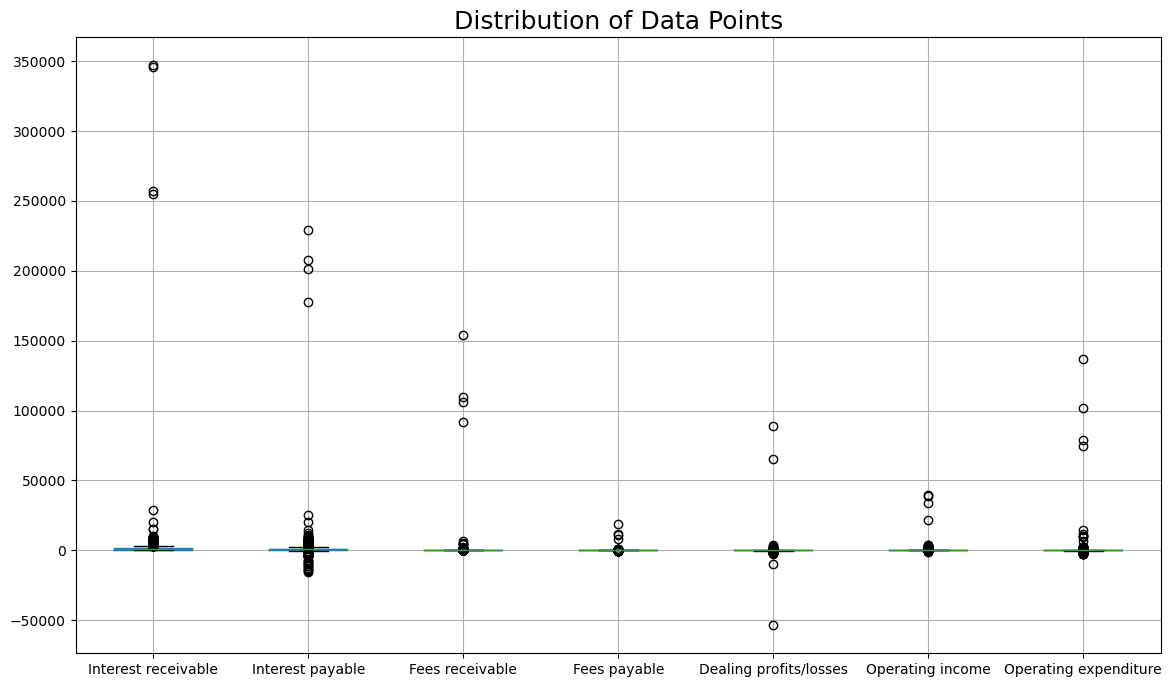

In [17]:
# Boxplot for columns 3 and onwards
ax = tbl_data.iloc[:, 2:].boxplot(figsize=(14,8))
ax.set_title('Distribution of Data Points', fontsize=18)
plt.show()

## Clean Data

In [18]:
# Delete the data for firm ID 758 for simpler summarisation
df_analysis = tbl_data[tbl_data.ID != 758]
df_analysis

,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
0,1,1,393.4,203.1,97.5,33.4,95.7,39.1,142.3
1,1,2,405.9,296.0,84.8,34.9,-291.7,39.5,137.4
2,1,3,392.2,298.3,62.4,25.1,30.2,35.7,71.5
3,1,4,404.6,303.0,102.9,27.6,9.5,49.7,138.8
4,1,5,294.2,274.3,142.1,26.0,91.8,35.4,103.0
...,...,...,...,...,...,...,...,...,...
3595,992,20,2156.4,1858.2,2.6,118.9,402.8,116.9,1413.0
3596,992,21,1951.8,1706.4,56.0,118.1,153.5,64.8,865.5
3597,992,22,1963.4,1627.2,99.8,113.5,-672.1,99.9,1035.6
3598,992,23,1568.9,1486.8,37.8,90.6,155.0,117.7,1129.1


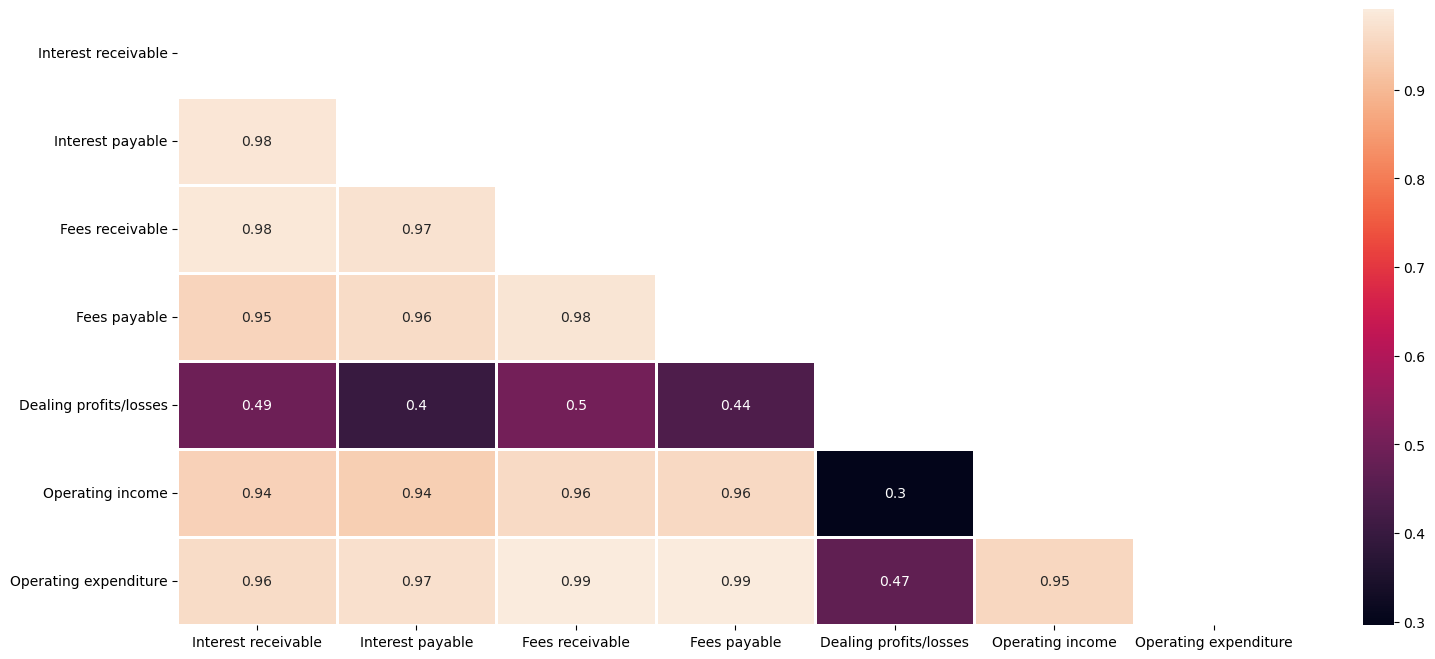

In [19]:
# To find out how each metric correlate with each other
corr = df_analysis.iloc[:,2:].corr()

# To visualise the correlation coefficients 
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, mask=np.triu(corr), linewidths=.8)
plt.show()

## Data Summarisation

In [20]:
# Group data by period and calculate the median for each variable
medianbyperiod = df_analysis.iloc[:, df_analysis.columns != 'ID'].groupby('period').median()

medianbyperiod

,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
period,,,,,,,
1,446.5,236.1,111.4,38.8,111.9,44.4,156.5
2,453.8,340.3,123.0,42.1,17.8,53.6,177.4
3,444.0,334.7,98.0,34.7,12.8,41.1,134.3
4,447.6,339.3,114.5,40.7,-7.1,74.8,254.9
5,341.5,294.6,112.1,36.6,13.6,49.0,167.5
6,343.2,252.5,119.3,40.7,60.0,56.5,185.5
7,457.0,297.1,106.4,35.4,-2.5,41.5,144.5
8,455.0,345.1,143.5,46.0,14.0,68.6,231.1
9,456.0,341.6,129.5,43.7,34.1,47.0,159.6


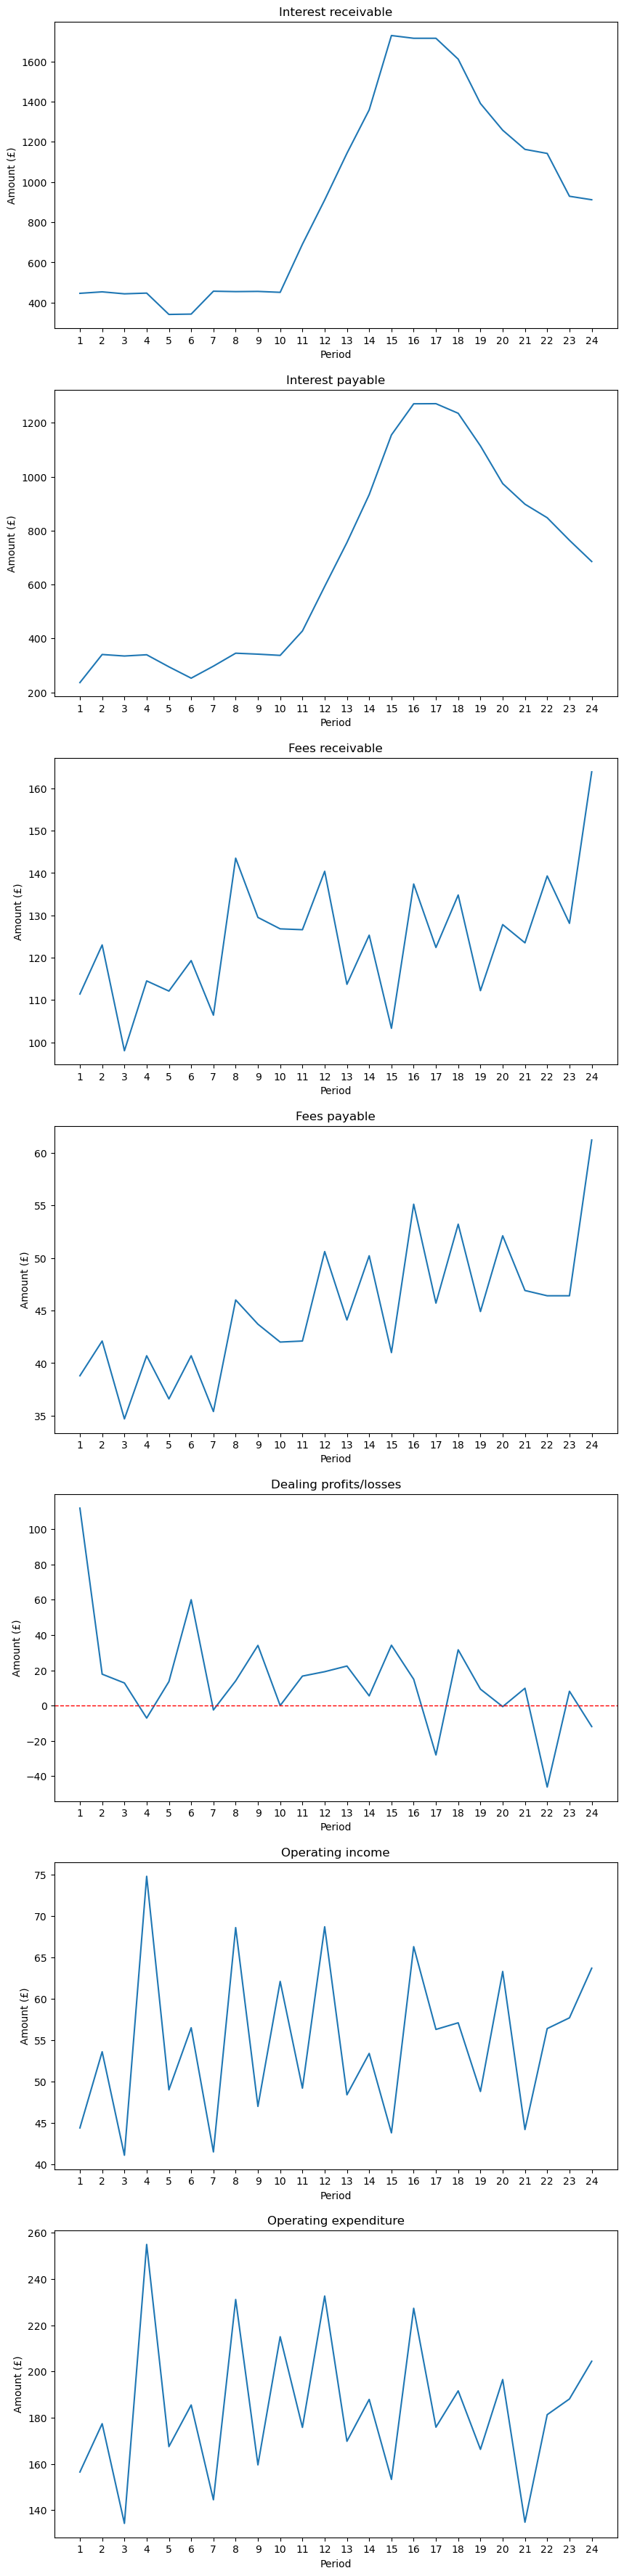

In [21]:
# Plot each variable in a separate subplot
fig, axes = plt.subplots(7, 1, figsize=(10, 45))

for i, ax in zip(medianbyperiod.columns, axes):
    ax.set_title(i)
    ax.set_xticks(range(1,25))
    ax.set_xlabel('Period')
    ax.set_ylabel('Amount (£)')
    ax.plot(medianbyperiod[i])
    # Add a dashed line if the graph shows negative values
    if min(medianbyperiod[i]) < 0:
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

In [22]:
# Calculate the total pre-tax revenue
medianbyperiod['Total pre-tax revenue'] = medianbyperiod['Interest receivable'] - medianbyperiod['Interest payable'] \
                                        + medianbyperiod['Fees receivable'] - medianbyperiod['Fees payable'] \
                                        + medianbyperiod['Dealing profits/losses'] \
                                        + medianbyperiod['Operating income'] - medianbyperiod['Operating expenditure']
medianbyperiod

,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure,Total pre-tax revenue
period,,,,,,,,
1,446.5,236.1,111.4,38.8,111.9,44.4,156.5,282.8
2,453.8,340.3,123.0,42.1,17.8,53.6,177.4,88.4
3,444.0,334.7,98.0,34.7,12.8,41.1,134.3,92.2
4,447.6,339.3,114.5,40.7,-7.1,74.8,254.9,-5.1
5,341.5,294.6,112.1,36.6,13.6,49.0,167.5,17.5
6,343.2,252.5,119.3,40.7,60.0,56.5,185.5,100.3
7,457.0,297.1,106.4,35.4,-2.5,41.5,144.5,125.4
8,455.0,345.1,143.5,46.0,14.0,68.6,231.1,58.9
9,456.0,341.6,129.5,43.7,34.1,47.0,159.6,121.7


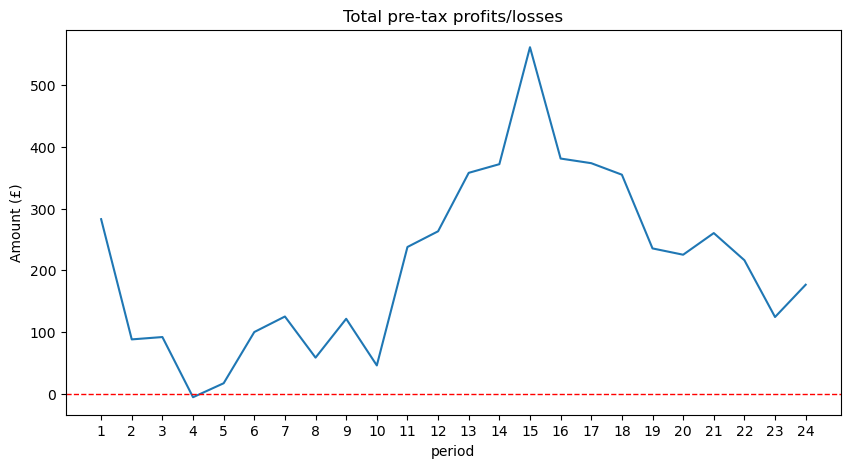

In [23]:
# Plot the total pre-tax revenue
ax = medianbyperiod['Total pre-tax revenue'].plot(figsize=(10,5), xticks=range(1,25))
# Add a dashed line if the graph shows negative values
ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax.set_title('Total pre-tax profits/losses')
ax.set_ylabel('Amount (£)')
plt.show()

## Miscellaneous

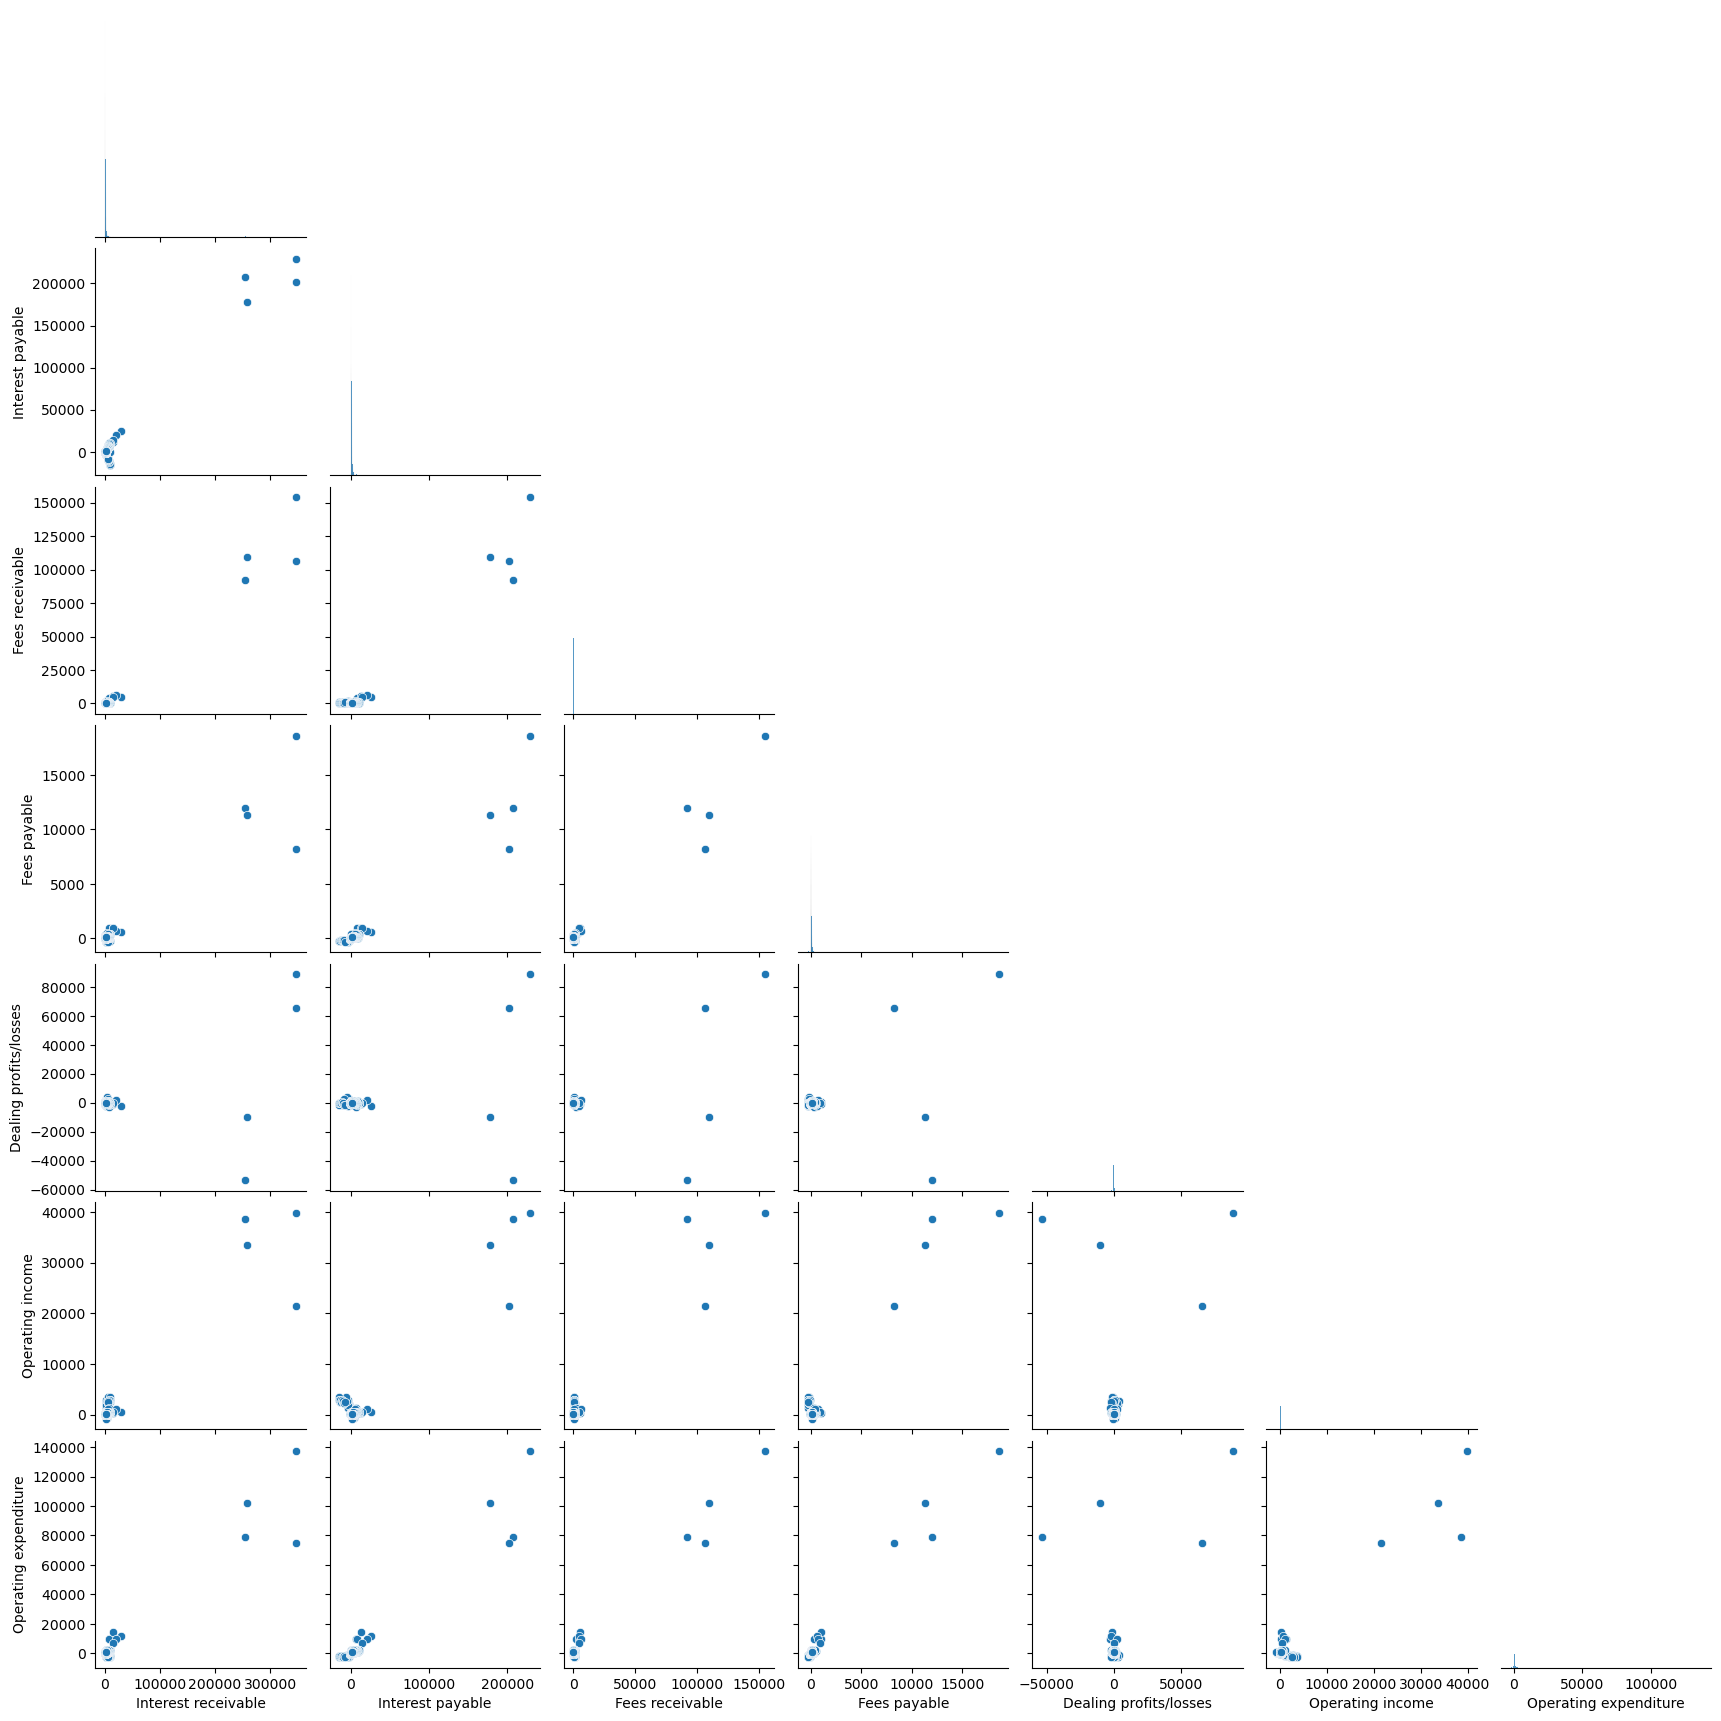

In [24]:
# Find the correlations between variables
sns.pairplot(tbl_data.iloc[:, 2:], corner=True, diag_kind="hist")
plt.show()

In [25]:
# Check any non-positive values
tbl_data[(tbl_data.iloc[:,[2,3,4,5,7,8]] <= 0).any(axis=1)]

,ID,period,Interest receivable,Interest payable,Fees receivable,Fees payable,Dealing profits/losses,Operating income,Operating expenditure
648,161,1,2684.4,-2719.5,1282.7,-218.5,665.5,1122.7,-1724.5
649,161,2,2755.7,-3904.1,1595.7,-252.4,-1911.0,1516.5,-1747.2
650,161,3,2606.7,-3796.4,1168.6,-188.2,386.6,1215.7,-1423.2
651,161,4,2667.2,-3760.7,1076.2,-239.8,578.8,2224.3,-2696.1
652,161,5,1978.6,-3320.0,904.3,-279.1,1134.9,1610.6,-1699.0
653,161,6,1933.4,-2859.4,664.8,-277.9,2921.2,2114.8,-2098.6
654,161,7,2666.6,-3496.6,925.5,-286.0,185.8,1314.8,-1365.2
655,161,8,2604.0,-4011.1,651.1,-315.3,45.8,2347.0,-2571.6
656,161,9,2707.2,-3782.9,301.0,-222.4,206.3,1915.1,-1133.8
657,161,10,2660.3,-3818.7,811.7,-198.4,7.4,2938.2,-1702.9


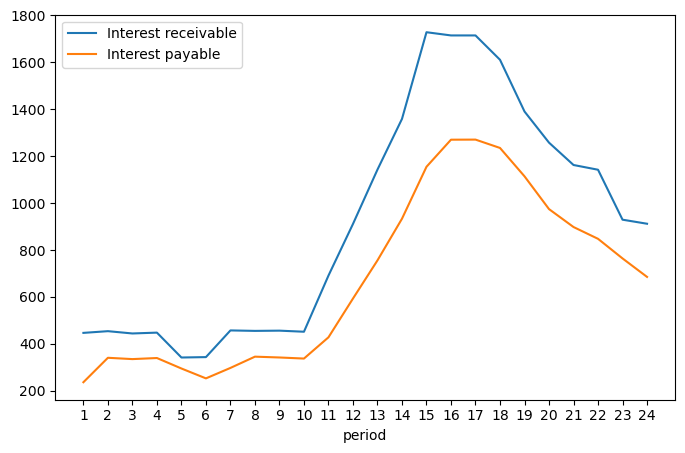

In [26]:
# Combine two lines into one graph for interest
medianbyperiod.plot(y=["Interest receivable", "Interest payable"], xticks=range(1,25), figsize=(8,5))
plt.show()

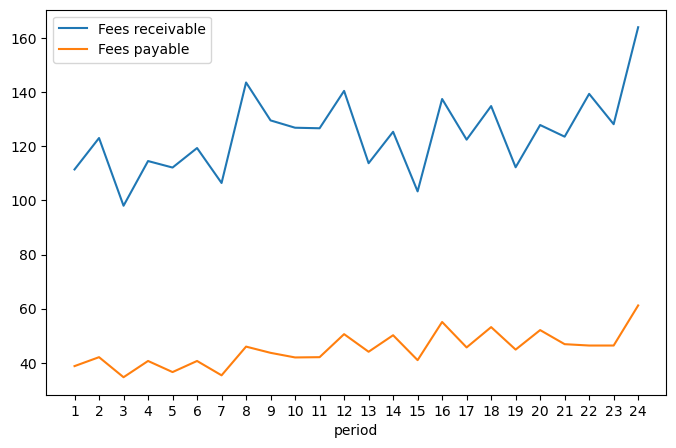

In [27]:
# Combine two lines into one graph for fees
medianbyperiod.plot(y=["Fees receivable", "Fees payable"], xticks=range(1,25), figsize=(8,5))
plt.show()